In [3]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv("C:/Users/91701/OneDrive/Desktop/Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df = df.drop("Id", axis=1)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [11]:
species_colors = {0: 'yellow', 1: 'red', 2: 'green'}

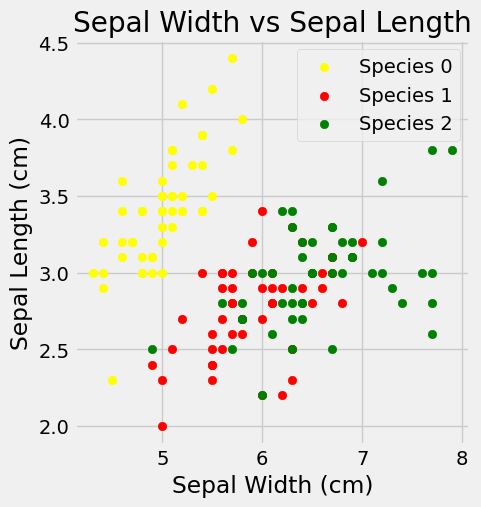

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs Sepal Length')
plt.legend()

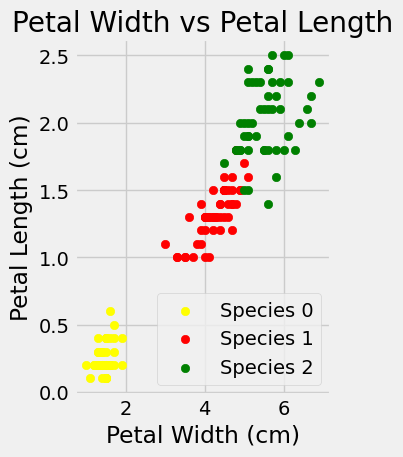

In [13]:
plt.subplot(1, 2, 2)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Width vs Petal Length')
plt.legend()

plt.tight_layout()
plt.show()

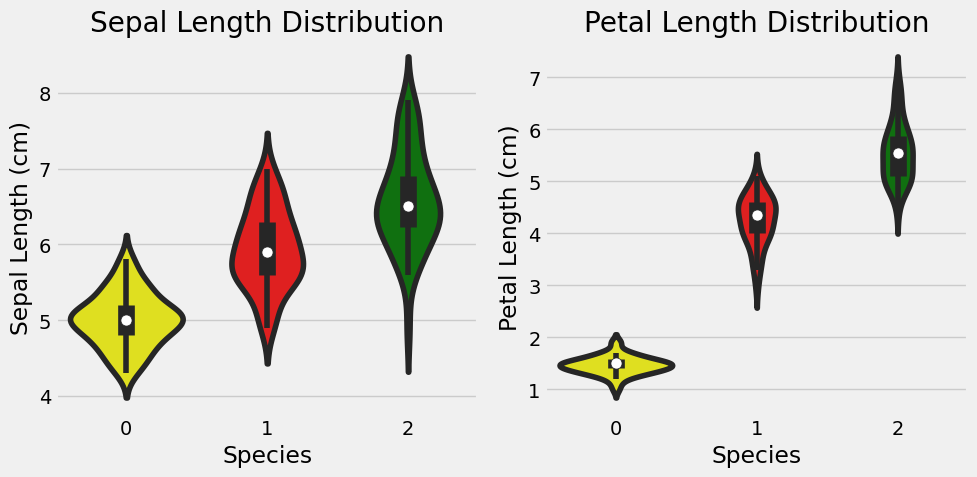

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length Distribution')

plt.tight_layout()
plt.show()


<Axes: >

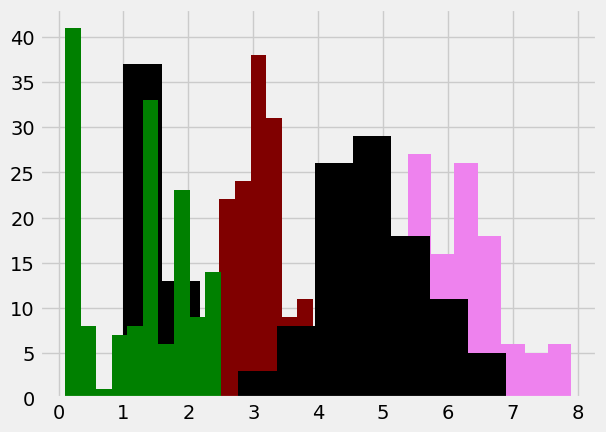

In [16]:
df['SepalLengthCm'].hist(color='violet')
df['SepalWidthCm'].hist(color='maroon')
df['PetalLengthCm'].hist(color='black')
df['PetalWidthCm'].hist(color='green')

In [17]:
x = df.drop('Species', axis=1)
y = df["Species"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (KNN): {:.2f}%".format(accuracy * 100))

Accuracy (KNN): 97.78%
